4.Over the years - male or female deaths
-----------------------------------------
----------------------

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import Orange

def replaceNan(data, indxs, val):
    for (i,v) in enumerate(indxs):
        if v == True:
            data[i] = val

f = pandas.read_excel("./tables/drugDeaths/femaleDeaths.xlsx")
m = pandas.read_excel("./tables/drugDeaths/maleDeaths.xlsx")

f_deaths = {}
m_deaths = {}

for god in range(1995,2018):
    for i,j in f.iterrows():
        broj = np.sum(f[god])
        f_deaths[god] = broj
        
for god in range(1995,2018):
    for i,j in m.iterrows():
        broj = np.sum(m[god])
        m_deaths[god] = broj
        
f_godini = [k for k  in f_deaths.keys()]
f_broj = [v for v in f_deaths.values()]
m_godini = [k for k in m_deaths.keys()] 
m_broj = [v for v in m_deaths.values()]


<Figure size 432x288 with 0 Axes>

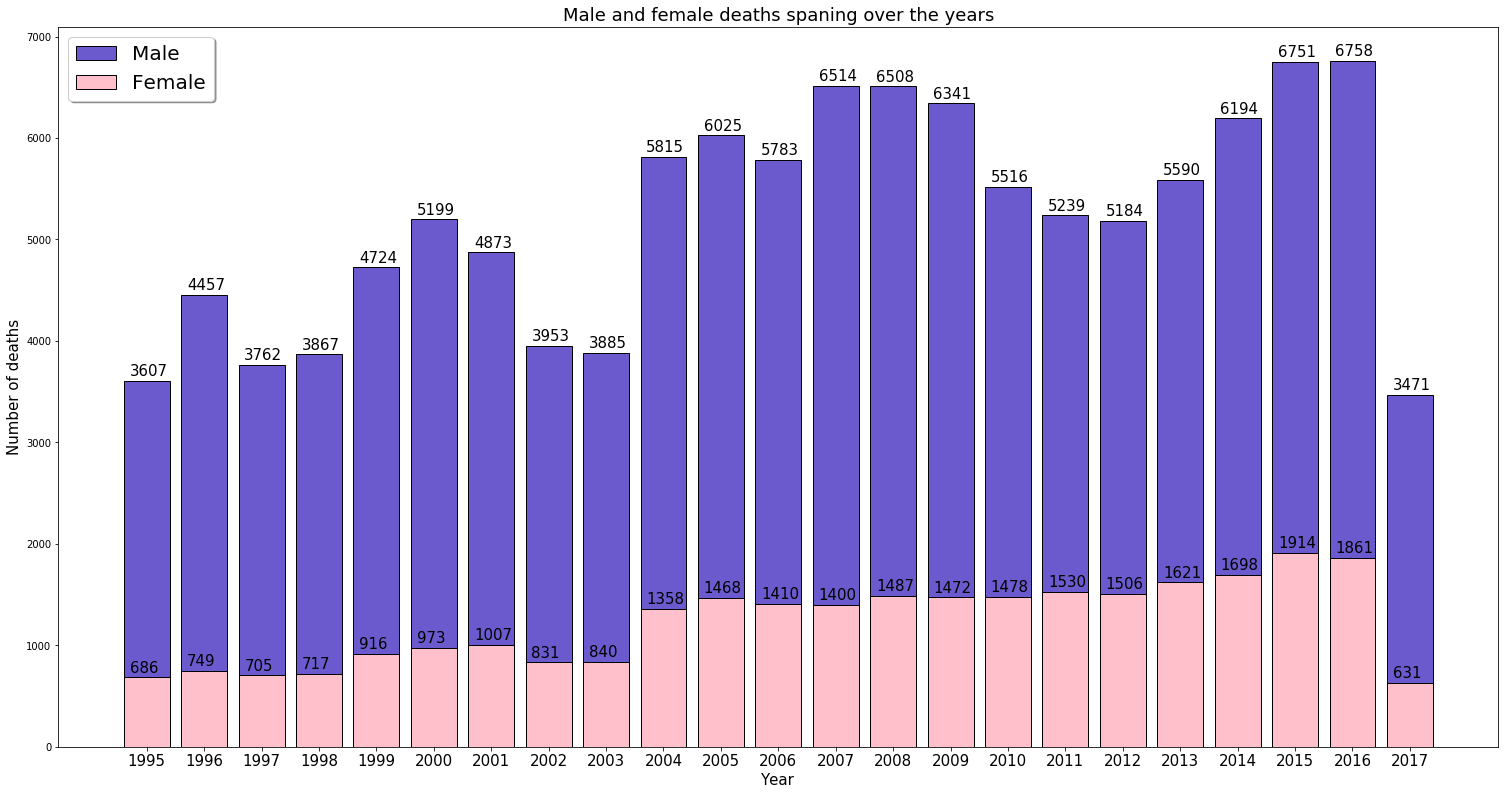

In [2]:
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

ax.bar(m_godini, m_broj, color="slateblue", label="Male", align='center', edgecolor="black")   # #2edf87(blue color)
ax.bar(f_godini , f_broj, color="pink", label="Female", align='center', edgecolor="black")
plt.xticks(m_godini, fontsize = 15)
plt.title("Male and female deaths spaning over the years", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of deaths", fontsize=15)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.10, i.get_height() + 50, \
            str(int((i.get_height()))), fontsize=15, color='black')
        
plt.legend(loc = 0, fontsize = 20, shadow = True)


3.Deaths and age()
------------------
-----------------------------------------------------

In [3]:
tables = ["deaths15-19.xlsx", "deaths20-24.xlsx", "deaths25-29.xlsx", "deaths30-34.xlsx", 
          "deaths35-39.xlsx" ,"deaths40-44.xlsx" ,"deaths45-49.xlsx", "deaths50-54.xlsx",
          "deaths55-59.xlsx", "deaths60-64.xlsx" , "deaths65-inf.xlsx"]
age = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-inf"]
dic = {}
matrix = []

for t,age in zip(tables,age):
    a = pandas.read_excel("./tables/drugDeaths/" + t)
    broj = 0
    for god in range(1995,2018):
        for i, row in a.iterrows():
            broj += np.sum(a[god])
    dic[age] = broj
            
ages = [k for k in dic.keys()]
deaths = [v for v in dic.values()]

<Figure size 432x288 with 0 Axes>

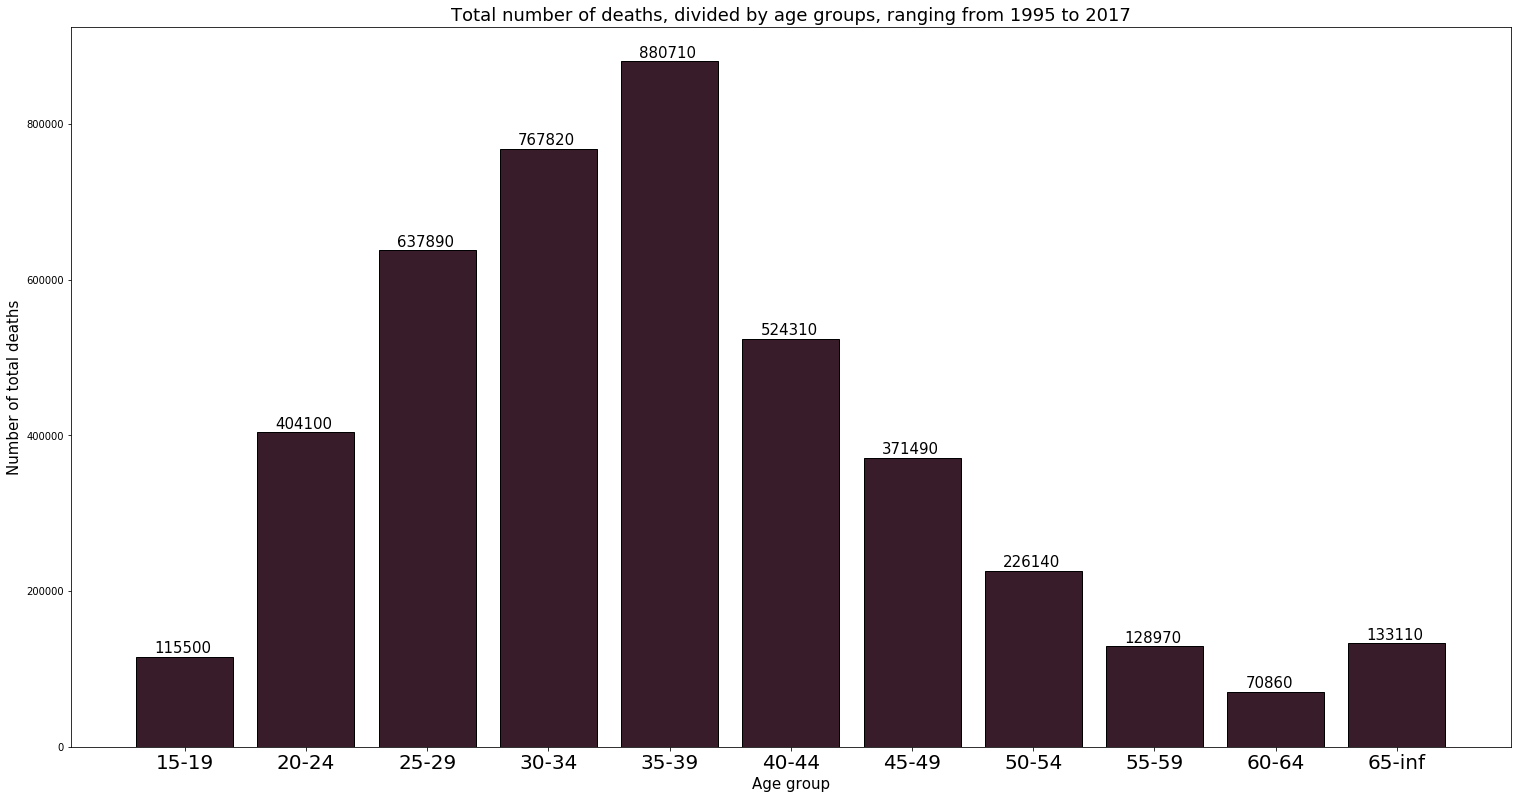

In [4]:
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

ax.bar(ages, deaths, color="#381c2a", align='center', edgecolor="black") 
plt.title("Total number of deaths, divided by age groups, ranging from 1995 to 2017", fontsize=18)
plt.xlabel("Age group", fontsize=15)
plt.ylabel("Number of total deaths", fontsize=15)
plt.xticks(size = 20)
plt.yticks(size = 10)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.15, i.get_height() + 5000, \
            str(int((i.get_height()))), fontsize=15, color='black')

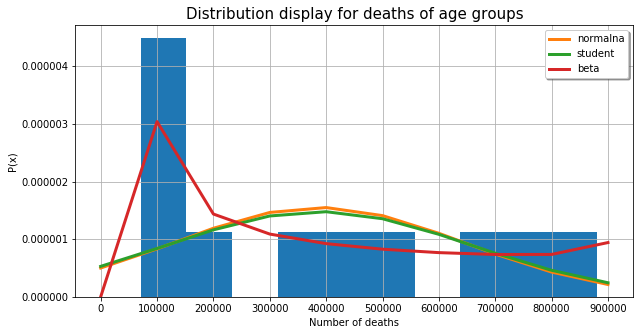

In [5]:
from scipy.stats import beta
from scipy.stats import multivariate_normal as mvn 
from scipy.stats import t as student 
n=11
g=np.linspace(0,900000,10)
mu_fit = np.mean(deaths)
sigma2_fit = (n-1)/n * np.var(deaths)
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in g]
pars = student.fit(deaths)
Pt_fit = [student.pdf(x, *pars) for x in g ]
a, b = (3, 2)
parameters = beta.fit(deaths)
Pb_fit = [beta.pdf(x, *parameters) for x in g ]
plt.figure(figsize=(10,5))
plt.hist(deaths,bins=10,density=True)
plt.plot(g, P_fit, label="normalna", linewidth=3.0)
plt.plot(g, Pt_fit, label="student",linewidth=3.0)
plt.plot(g, Pb_fit, label="beta",linewidth=3.0)
plt.xlabel("Number of deaths",fontsize=10)
plt.xticks([x for x in range(0,900001, 100000)], rotation = 0)
plt.ylabel("P(x)",fontsize=10)
plt.title("Distribution display for deaths of age groups",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()

Text(0.5, 1.0, 'Z-score distribution for deaths of age groups')

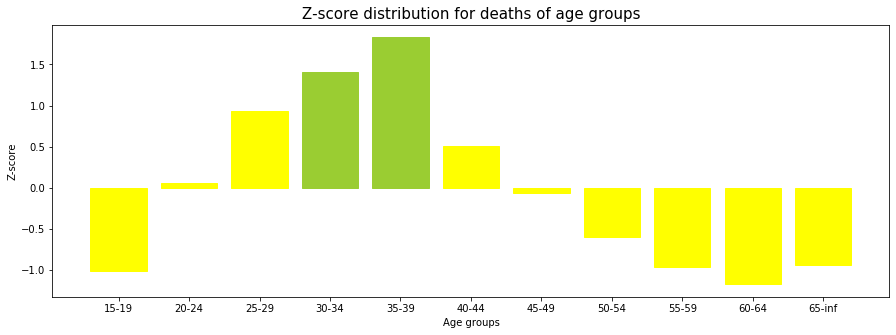

In [6]:
from scipy import stats

zscores=dict(zip(ages,stats.zscore([v for v in deaths])))
def getColor(zVal):
    val=""
    bot10 = stats.norm.ppf(0.1)
    top10 = stats.norm.ppf(1-0.1)
    
    bot30 = stats.norm.ppf(0.25)
    top30 = stats.norm.ppf(1-0.25)

    if zVal > bot10 and zVal < top10:

        if zVal > bot30 and zVal < top30:
            val="MEDIUM"
            return val
        if zVal> bot30:
            val="MEDIUM"
            return val
        val="MEDIUM"
        return val

    if zVal> bot10:
        val="HIGH"
        return val
    val="LOW"
    return val

scores=[]
for i,v in enumerate(zscores.values()):
    z=getColor(v)
    scores.append(z)
    
plt.figure(figsize=(15,5))
sc=plt.bar(zscores.keys(),zscores.values())
plt.xticks([i for i in zscores.keys()])
for j,i in enumerate(scores):
    color="b"
    if(i=="MEDIUM"):
        color="yellow"
    elif(i=="HIGH"):
        color="yellowgreen"
    elif(i=="VERY HIGH"):
        color="lime"
    elif(i=="LOW"):
        color="orangered"
    else:
        color="red"
    sc[j].set_color(color)
plt.xlabel("Age groups",fontsize=10)
plt.ylabel("Z-score",fontsize=10)
plt.title("Z-score distribution for deaths of age groups",fontsize=15)


In [7]:
def make_matrix(n,m):
    return [ [ 0 for i in range(n) ] for j in range(m) ]
            
countries = []
matrix = make_matrix(11,30)
for i, t in enumerate(tables):
    a = pandas.read_excel("./tables/drugDeaths/" + t)
    
    for j, row in a.iterrows():
        c = row["Country"].strip().replace("*", "").strip()
        countries.append(c)
        deaths = 0
        for col in a.columns[:-1][1:]:
            if not np.isnan(row[col]):
                deaths += row[col]
        
        if deaths == 0:
            matrix[j][i] = -1.0
        else:
            matrix[j][i] = deaths

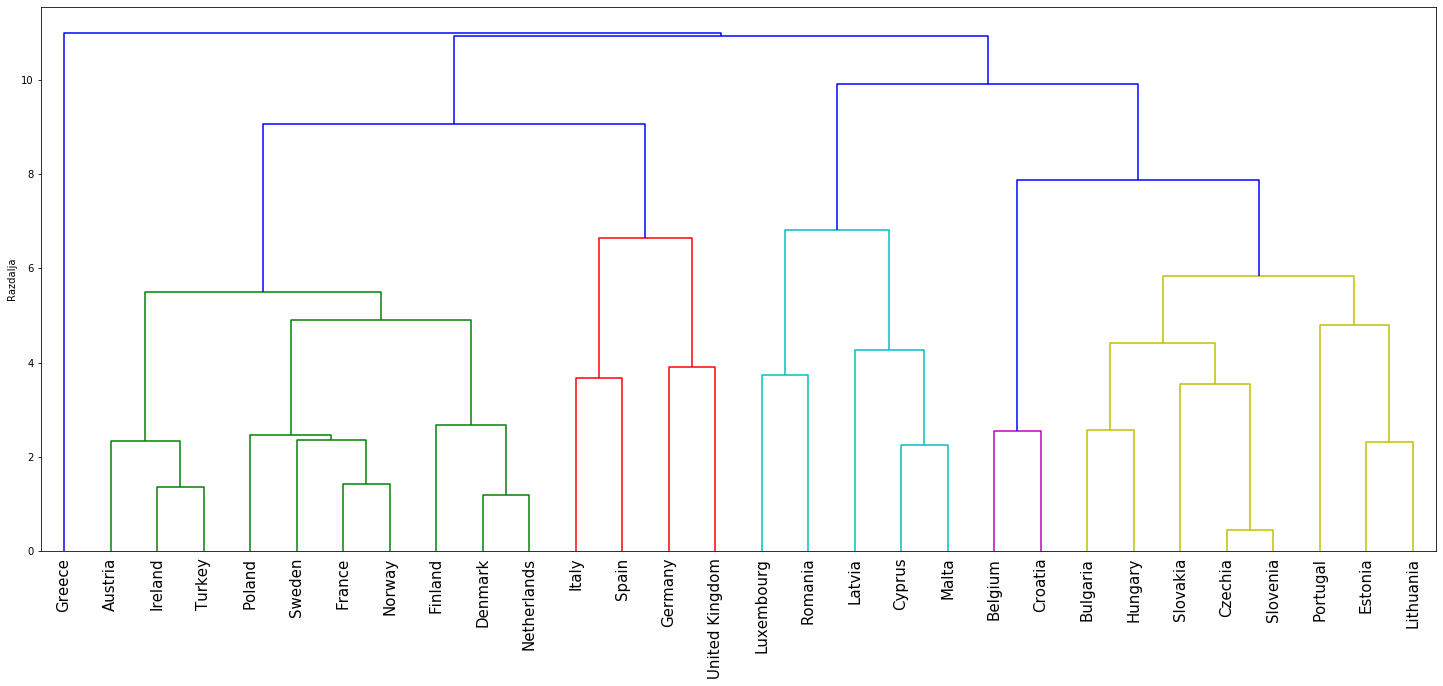

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

L = sch.linkage(matrix, method="complete", metric="canberra")
plt.figure(figsize=(25, 10))
labels = [c for c in countries]
D    = sch.dendrogram(L, labels=labels, leaf_font_size=15, leaf_rotation = 90, )
plt.ylabel("Razdalja")
plt.show()

2.Price vs consumation
------------
------

In [9]:
def culmulative(arr):
    zbir = arr[0]
    for i,_ in enumerate(arr):
        if i > 0:
            zbir += arr[i]
            arr[i] = zbir
            
    return arr

def read_table(user, price, high_country, mid_country, mid_country1, low_country):
    users = pandas.read_excel("./tables/drugOffenses/%s" % user)
    user_dic = {}
    
    for i, row in users.iterrows():
        if type(row["Country"]) is str:
            country = row["Country"].strip().replace("*", "").strip()
            a = []
            
            for j in range(2005, 2018):
                if(np.isnan(row[j])):
                    a.append(0)
                else: 
                    a.append(row[j])  
            user_dic[country] = a
        
    prices = pandas.read_excel("./tables/pricePurity/%s" % price)
    price_dic = {}
    
    for i, row in prices.iterrows():
        if type(row["Country"]) is str:
            country = row["Country"].strip().replace("*", "").strip()
            b = []  

            for j in range(2005,2018):
                if(np.isnan(row[j])):
                    b.append(0)
                else: 
                    b.append(row[j])    
            price_dic[country] = b
        
    high = {}
    
    for i,p in enumerate(price_dic[high_country]):
        high[p] = int(user_dic[high_country][i])

    p_high = sorted(high)
    u_high = []
    for v in p_high:
        u_high.append(high[v])
        
    mid = {}
    
    for i,p in enumerate(price_dic[mid_country]):
        mid[p] = int(user_dic[mid_country1][i])

    p_mid = sorted(mid)
    u_mid = []
    for v in p_mid:
        u_mid.append(mid[v])
        
    low = {}
    
    for i,p in enumerate(price_dic[low_country]):
        low[p] = int(user_dic[low_country][i])

    p_low = sorted(low)
    u_low = []
    for v in p_low:
        u_low.append(low[v])
        
    return p_high, u_high, p_mid, u_mid, p_low, u_low, prices
                

In [10]:
cocaine_p_high, cocaine_u_high, cocaine_p_med, cocaine_u_med, cocaine_p_low, cocaine_u_low, cocaine_price = read_table("cocaineUsers.xlsx","cocainePriceMean.xlsx","Germany","Belgium-A","Belgium","Portugal")
cannabis_p_high, cannabis_u_high, cannabis_p_med, cannabis_u_med, cannabis_p_low, cannabis_u_low, cannabis_price = read_table("cannabisUsers.xlsx","cannabisPriceMean.xlsx","Germany","Belgium-A","Belgium","Portugal")
ecstasy_p_high, ecstasy_u_high, ecstasy_p_med, ecstasy_u_med, ecstasy_p_low, ecstasy_u_low, ecstasy_prices = read_table("ecstasyUsers.xlsx","ectasyPriceMean.xlsx","Germany","Belgium-A","Belgium","Portugal")

In [11]:
heroin_users = pandas.read_excel("./tables/drugOffenses/heroinUsers.xlsx")
heroin_users_dic = {}

for i,row in heroin_users.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        users = []
        
        for j in range(2005,2018):
            if(np.isnan(row[j])):
                users.append(0)
            else: 
                users.append(row[j])  
        heroin_users_dic[country] = users


heroin_brown_price = pandas.read_excel("./tables/pricePurity/brownHeroinPriceMean.xlsx")
heroin_white_price = pandas.read_excel("./tables/pricePurity/whiteHeroinPriceMean.xlsx")
heroin_price_dic = {}

for i,row in heroin_brown_price.iterrows():
    prices = [] 
    for k,row1 in heroin_white_price.iterrows():
        if i == k:
            if type(row["Country"]) is str:
                country = row["Country"].strip().replace("*", "").strip()
                for j in range(2005,2018):
                    arr = []
                    if np.isnan(row[j]) and np.isnan(row1[j]):
                        arr.append(0)
                        arr.append(0)
                    elif np.isnan(row1[j]): 
                        arr.append(0) 
                        arr.append(row[j])
                    elif  np.isnan(row[j]):
                        arr.append(0)
                        arr.append(row1[j])
                    else:
                        arr.append(row[j])
                        arr.append(row1[j])
                    prices.append(round(sum(arr)/2,2))
            heroin_price_dic[country] = prices
            break
        
heroin_high = {}

for i,p in enumerate(heroin_price_dic["Italy"]):
    heroin_high[p] = int(heroin_users_dic["Italy"][i])
    
heroin_p_high = sorted(heroin_high)
heroin_u_high = []
for v in heroin_p_high:
    heroin_u_high.append(heroin_high[v])

heroin_med = {}
for i,p in enumerate(heroin_price_dic["Belgium-B"]):
    heroin_med[p] = int(heroin_users_dic["Belgium"][i])
    
heroin_p_med = sorted(heroin_med)
heroin_u_med = []
for v in heroin_p_med:
    heroin_u_med.append(heroin_med[v])
    
heroin_low = {}
for i,p in enumerate(heroin_price_dic["Portugal"]):
    heroin_low[p] = int(heroin_users_dic["Portugal"][i])
    
heroin_p_low = sorted(heroin_low)
heroin_u_low = []
for v in heroin_p_low:
    heroin_u_low.append(heroin_low[v])

##heroin_u_high = culmulative(heroin_u_high)
##heroin_u_med = culmulative(heroin_u_med)
##heroin_u_low = culmulative(heroin_u_low)

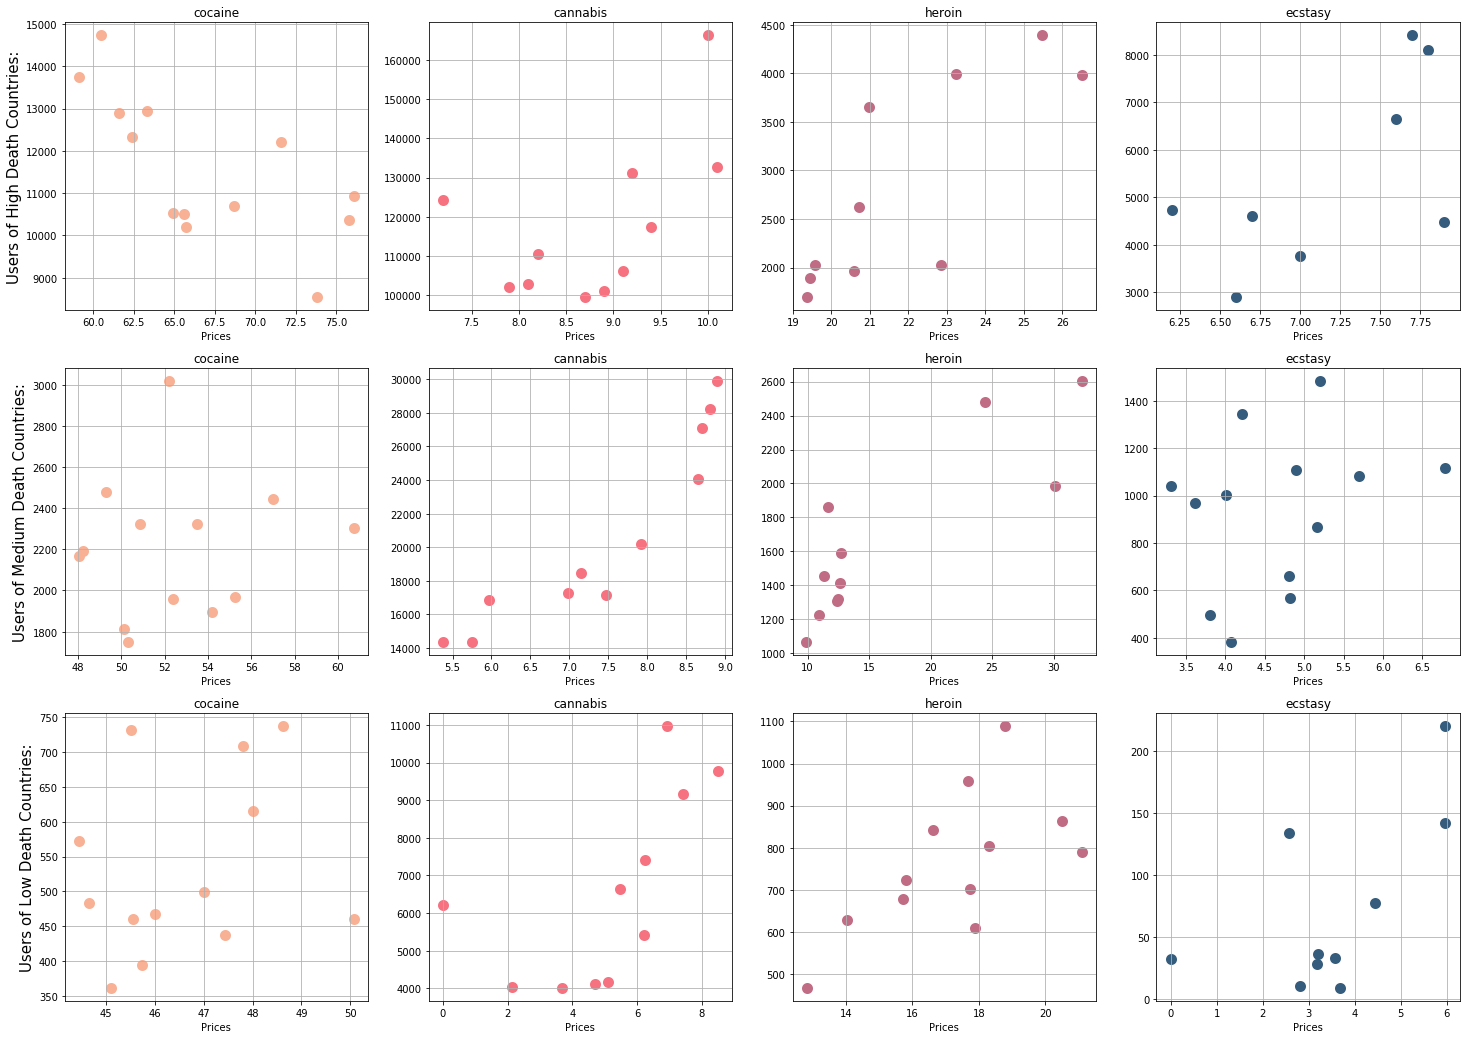

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(25,18))

axs[0, 0].set_ylabel("Users of High Death Countries:", fontsize=15)
axs[1, 0].set_ylabel("Users of Medium Death Countries:", fontsize=15)
axs[2, 0].set_ylabel("Users of Low Death Countries:", fontsize=15)

drugs = ["cocaine", "cannabis", "heroin", "ecstasy"]
for x in range(0,3):
    for y in range(0,4):
        axs[x, y].set_xlabel("Prices")
        axs[x, y].set_title("%s" % drugs[y])
        axs[x, y].grid()

axs[0, 0].scatter(cocaine_p_high, cocaine_u_high, linewidth=5, color = "#f8b195")
axs[0, 1].scatter(cannabis_p_high, cannabis_u_high, linewidth=5, color = "#f67280")
axs[0, 2].scatter(heroin_p_high[:-1], heroin_u_high[:-1], linewidth=5, color = "#c06c84")
axs[0, 3].scatter(ecstasy_p_high, ecstasy_u_high, linewidth=5, color = "#355c7d")

axs[1, 0].scatter(cocaine_p_med, cocaine_u_med, linewidth=5, color = "#f8b195" )
axs[1, 1].scatter(cannabis_p_med, cannabis_u_med, linewidth=5, color = "#f67280")
axs[1, 2].scatter(heroin_p_med[:-1], heroin_u_med[:-1], linewidth=5, color = "#c06c84")
axs[1, 3].scatter(ecstasy_p_med, ecstasy_u_med, linewidth=5, color = "#355c7d")

axs[2, 0].scatter(cocaine_p_low, cocaine_u_low, linewidth=5, color = "#f8b195")
axs[2, 1].scatter(cannabis_p_low, cannabis_u_low, linewidth=5, color = "#f67280")
axs[2, 2].scatter(heroin_p_low[:-1], heroin_u_low[:-1], linewidth=5, color = "#c06c84")
axs[2, 3].scatter(ecstasy_p_low, ecstasy_u_low, linewidth=5, color = "#355c7d")


1.Price vs deaths
--------------
-------------

In [13]:
total_deaths = {}
for i,row in m.iterrows():
    for j, row1 in f.iterrows():
        if i == j:
            for x in range(1995,2018):
                total_deaths[x] = np.sum(f[x]) + np.sum(m[x])
price_mean = {}

for i, row in cannabis_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] = round(np.mean(cannabis_price[x]),2) 
        
for i, row in cocaine_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(cocaine_price[x]),2)
                
for i, row in ecstasy_prices.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(ecstasy_prices[x]),2)

for i, row in heroin_brown_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(heroin_brown_price[x]),2)
        
for i, row in heroin_white_price.iterrows():
    for x in range(1995,2018):
        price_mean[x] += round(np.mean(heroin_white_price[x]),2)
        price_mean[x] = price_mean[x] / 5
        
price_list = []
death_list = []
years = []

for i in range(1996,2018):
    price_list.append(int(price_mean[i]))
    death_list.append(int(total_deaths[i]))
    years.append(i)


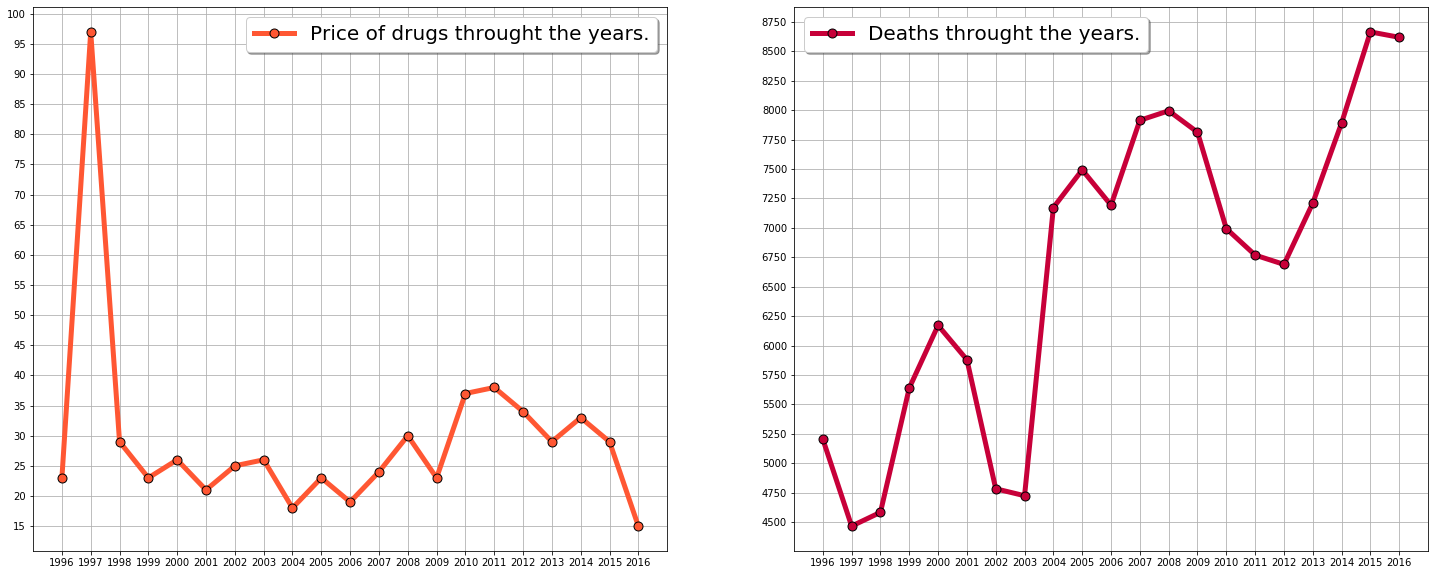

In [14]:
fig, axs = plt.subplots( 1, 2 ,figsize=(25,10))
axs[0].set_xticks(years[:-1], )
axs[1].set_xticks(years[:-1], )
axs[0].set_yticks([i for i in range(0,101,5)])
axs[1].set_yticks([i for i in range(0,10000,250)])
axs[0].grid()
axs[1].grid()

axs[0].plot(years[:-1], price_list[:-1], color = "#ff5733", linewidth=5, marker = ".", markersize = 18, markeredgecolor = "black", label="Price of drugs throught the years.")
axs[1].plot(years[:-1], death_list[:-1], color = "#c70039", linewidth=5, marker = ".", markersize = 18, markeredgecolor = "black", label="Deaths throught the years.")

axs[0].legend(loc = 0, fontsize = 20, shadow = True)  
axs[1].legend(loc = 0, fontsize = 20, shadow = True)   


<Figure size 432x288 with 0 Axes>

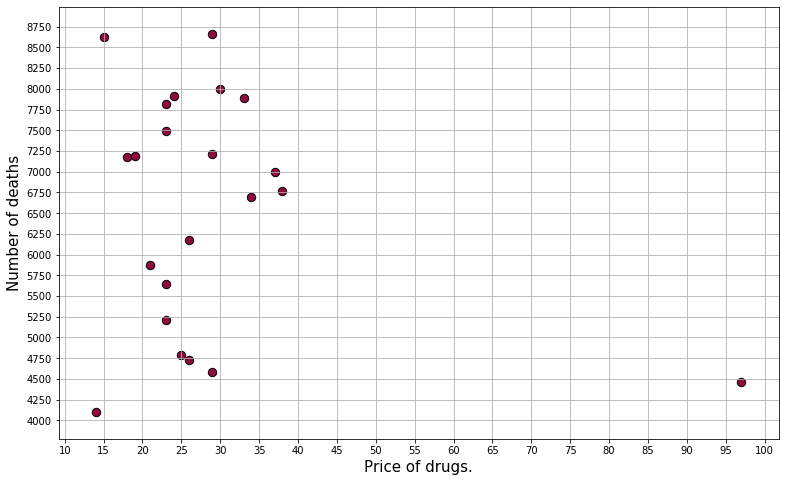

In [15]:
fig = plt.figure()
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xticks([i for i in range(0,101,5)])
ax.set_yticks([i for i in range(0,9001,250)])
ax.grid()
plt.xlabel("Price of drugs.", fontsize = 15)
plt.ylabel("Number of deaths", fontsize = 15)
ax.scatter(price_list, death_list, marker="o", edgecolors="black",s = 70, color = "#900c3f")


Regression: Price vs Deaths 
---------------
---------------

In [38]:
def regressor(data):
    lin = Orange.regression.linear.LinearRegressionLearner()
    lin.name = "lin"
    rf = Orange.regression.random_forest.RandomForestRegressionLearner()
    rf.name = "rf"
    ridge = Orange.regression.RidgeRegressionLearner()
    ridge.name = "ridge"
    mean = Orange.regression.MeanLearner()

    learners = [lin, rf, ridge, mean]
    
    print(" "*9 + " ".join("%-4s" % learner.name for learner in learners))
    cv = Orange.evaluation.CrossValidation(k=5)
    res = cv(data, learners)
    print("R2       %s" % " ".join("%.2f" % s for s in Orange.evaluation.R2(res)))
    print("MAE      %s" % " ".join("%.2f" % s for s in Orange.evaluation.MAE(res)))
    return res

def count_nulu(a):
    return len([x for x in a if x == 0])

In [39]:
m = pandas.read_excel("./tables/drugDeaths/maleDeaths.xlsx")
m.fillna(0)
f = pandas.read_excel("./tables/drugDeaths/femaleDeaths.xlsx") 
f.fillna(0)

dataM = {}
dataF = {}
def replaceNan(data, indxs, val):
    for (i,v) in enumerate(indxs):
        if v == True:
            data[i] = val
for i,row in m.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        dataM[country] = [row[col] for col in m.columns[:-1][1:]]
        nan_indx = np.isnan(dataM[country])
        replaceNan(dataM[country], nan_indx,0)
    
for i,row in f.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        dataF[country] = [row[col] for col in f.columns[:-1][1:]]
        nan_indx = np.isnan(dataF[country])
        replaceNan(dataF[country], nan_indx,0)

In [40]:
deaths_by_year = {}
for i in range(23):
    for country in dataM.keys():
        if country not in deaths_by_year:
            deaths_by_year[country] = dict()
        deaths_by_year[country][1995 + i]= dataM[country][i] + dataF[country][i]

In [57]:
tables = [{ "path": "./tables/pricePurity/cocainePriceMean.xlsx"}, 
         { "path": "./tables/pricePurity/cannabisPriceMean.xlsx"},
         { "path": "./tables/pricePurity/ectasyPriceMean.xlsx"},
         { "path": "./tables/pricePurity/brownHeroinPriceMean.xlsx"},
         { "path": "./tables/pricePurity/whiteHeroinPriceMean.xlsx"}]

matrix = [] 

years = set()
for (num, tab) in enumerate(tables):
    file = pandas.read_excel(tab["path"])
    drug = {}
    for i,row in file.iterrows():
        r = []
        if type(row["Country"]) is str:
            for col in file.columns[2:][:-1]:
                try:
                    r.append(int(row[col]))
                except:
                    r.append(0)
           
            c = row["Country"].strip().replace("*", "").strip()
            
            if "-" in c:
                c = c[:-2]
            if c in drug.keys() and count_nulu(r) > count_nulu(drug[c]):
                drug[c] = r
            else:
                drug[c] = r
    matrix.append(drug)


         lin  rf   ridge mean
R2       0.29 0.66 0.29 -0.01
MAE      126.06 78.68 126.06 174.67


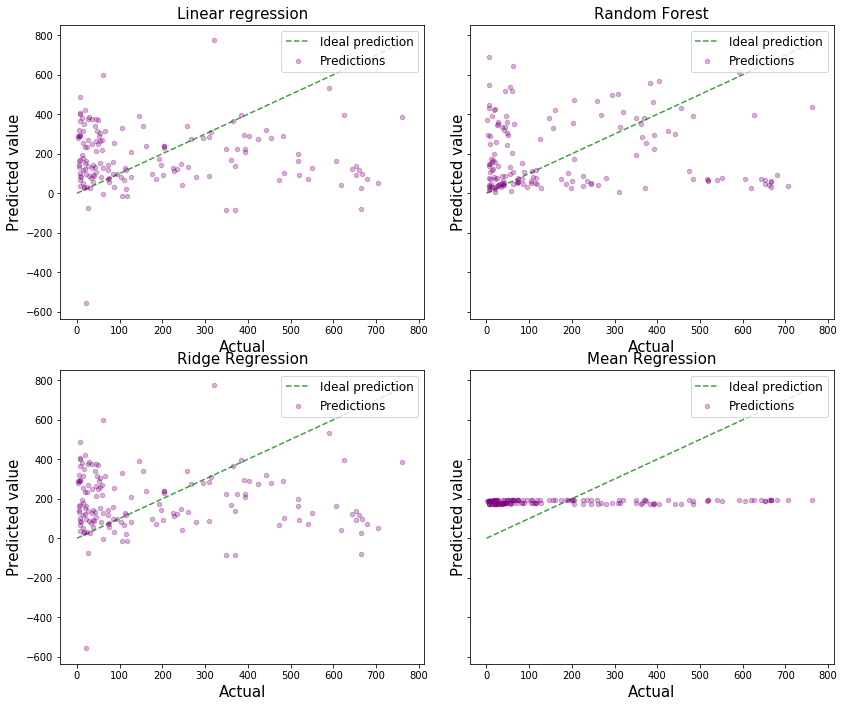

In [65]:
main_matrix = []
death_matrix=[]
for c in matrix[0].keys():
    cmatrix = []
    coc = matrix[0]
    cana = matrix[1]
    ecs = matrix[2]
    hero_b = matrix[3]
    hero_w = matrix[4]
    
    for i in range(23):
        deaths = deaths_by_year[c][1995+i]
        he = hero_b[c][i]
        co = coc[c][i]
        can = cana[c][i]
        ec = ecs[c][i]
        if deaths > 0 and he > 0 and co > 0 and can > 0 and ec > 0:
            cmatrix.append([he, co, can, ec])
            death_matrix.append(deaths)
            
    main_matrix.extend(cmatrix)
drugs = ["heroin", "cocaine", "canabis", "ecstasy"]
variables = [ Orange.data.ContinuousVariable(a) for a in drugs]
deaths = Orange.data.ContinuousVariable("deaths")

domain = Orange.data.Domain(variables, deaths)

data = Orange.data.Table(main_matrix, death_matrix)
r = regressor(data)

x=[[],[],[],[]]
y=[[],[],[],[]]
for i,l in enumerate(r.predicted.tolist()):
    for pred,act in zip(l, death_matrix):
        x[i].append(act)
        y[i].append(pred)

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True )
fig.tight_layout(pad=3.0)
methods = ["Linear regression", "Random Forest", "Ridge Regression", "Mean Regression"]
for i in range(4):
    
    ax[i//2][i%2].scatter(x[i], y[i], label = "Predictions", s=20, alpha=0.3, color="purple")
    ax[i//2][i%2].set_xlabel("Actual", fontsize=15.0)
    ax[i//2][i%2].set_ylabel("Predicted value", fontsize=15.0)
    ax[i//2][i%2].set_title(methods[i], fontsize=15.0)
    
    lims=np.arange(0,max(y[0]),1)

    ax[i//2][i%2].plot(lims, lims, '--', alpha=0.75, zorder=0, label = "Ideal prediction", color="green")
    ax[i//2][i%2].legend(loc="upper right", prop={'size': 12})

Regression: Users vs Deaths 
---------
---------

In [77]:
tables = [{ "path": "./tables/drugOffenses/cannabisUsers.xlsx"}, 
         { "path": "./tables/drugOffenses/cocaineUsers.xlsx"},
         { "path": "./tables/drugOffenses/ecstasyUsers.xlsx"},
         { "path": "./tables/drugOffenses/heroinUsers.xlsx"}]

matrix = [] 

for (num, tab) in enumerate(tables):
    file = pandas.read_excel(tab["path"])
    drug = {}
    for i,row in file.iterrows():
        r = []
        if type(row["Country"]) is str:
            for col in file.columns[1:][:-1]:
                try:
                    r.append(int(row[col]))
                except:
                    r.append(0)
           
            c = row["Country"].strip().replace("*", "").strip()
            drug[c] = r
    matrix.append(drug)


         lin  rf   ridge mean
R2       0.65 0.94 0.65 -0.03
MAE      197.58 74.13 197.58 374.45


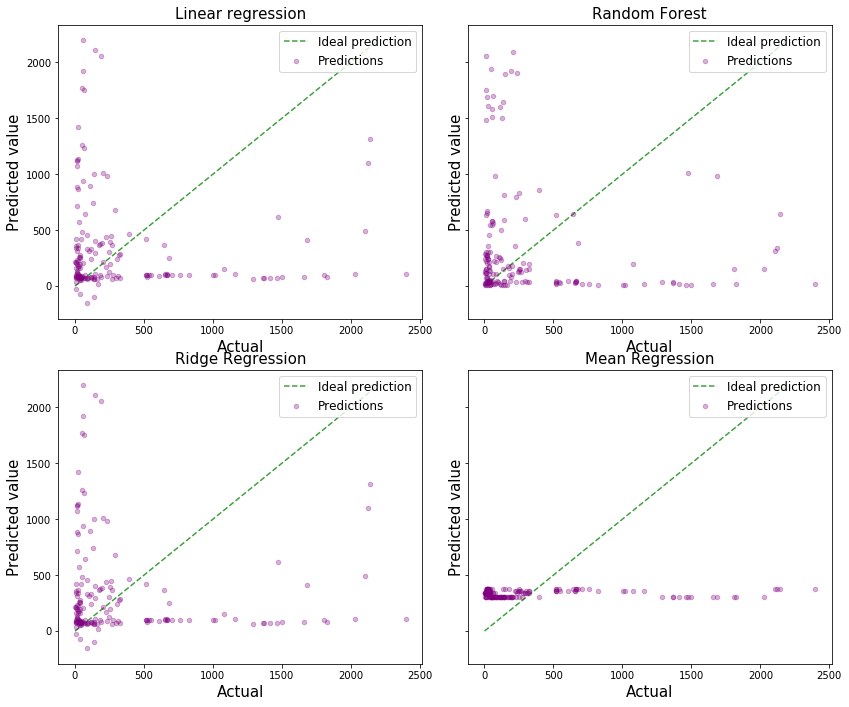

In [78]:
main_matrix = []
death_matrix=[]
for c in matrix[0].keys():
    cmatrix = []
    cana = matrix[0]
    coc = matrix[1]
    ecs = matrix[2]
    hero = matrix[3]
    
    for i in range(14):
        deaths = deaths_by_year[c][2004+i]
        he = hero[c][i]
        co = coc[c][i]
        can = cana[c][i]
        ec = ecs[c][i]
        if deaths > 0 and he > 0 and co > 0 and can > 0 and ec > 0:
            cmatrix.append([he, co, can, ec])
            death_matrix.append(deaths)
            
    main_matrix.extend(cmatrix)
drugs = ["heroin", "cocaine", "canabis", "ecstasy"]
variables = [ Orange.data.ContinuousVariable(a) for a in drugs]
deaths = Orange.data.ContinuousVariable("deaths")

domain = Orange.data.Domain(variables, deaths)

data = Orange.data.Table(main_matrix, death_matrix)
r = regressor(data)

x=[[],[],[],[]]
y=[[],[],[],[]]
for i,l in enumerate(r.predicted.tolist()):
    for pred,act in zip(l, death_matrix):
        x[i].append(act)
        y[i].append(pred)

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True )
fig.tight_layout(pad=3.0)
methods = ["Linear regression", "Random Forest", "Ridge Regression", "Mean Regression"]
for i in range(4):
    
    ax[i//2][i%2].scatter(x[i], y[i], label = "Predictions", s=20, alpha=0.3, color="purple")
    ax[i//2][i%2].set_xlabel("Actual", fontsize=15.0)
    ax[i//2][i%2].set_ylabel("Predicted value", fontsize=15.0)
    ax[i//2][i%2].set_title(methods[i], fontsize=15.0)
    
    lims=np.arange(0,max(y[0]),1)

    ax[i//2][i%2].plot(lims, lims, '--', alpha=0.75, zorder=0, label = "Ideal prediction", color="green")
    ax[i//2][i%2].legend(loc="upper right", prop={'size': 12})